In [1]:
pip install opendatasets

In [2]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 from tensorflow.keras import layers
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.models import load_model
 from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras.preprocessing import image
 import pandas as pd
 import opendatasets  as od

In [3]:
 od.download("https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohanapriya9080
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis


100%|██████████| 1.74G/1.74G [00:17<00:00, 108MB/s]


In [4]:
 data_dir = "/content/test-dataset"

In [5]:
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory('/content/chest-xray-pneumoniacovid19tuberculosis/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')

Found 5061 images belonging to 4 classes.


In [8]:
val_generator=train_datagen.flow_from_directory('/content/chest-xray-pneumoniacovid19tuberculosis/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')

Found 1265 images belonging to 4 classes.


In [9]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class Indices:", class_indices)
print("Class Names:", class_names)
print(class_indices)

Class Indices: {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}
Class Names: ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}


In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=4,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
159/159 ━━━━━━━━━━━━━━━━━━━━ 601s 4s/step - accuracy: 0.7475 - loss: 0.8039 - val_accuracy: 0.8909 - val_loss: 0.3004
Epoch 2/4
159/159 ━━━━━━━━━━━━━━━━━━━━ 577s 4s/step - accuracy: 0.9381 - loss: 0.1793 - val_accuracy: 0.9368 - val_loss: 0.1731
Epoch 3/4
159/159 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.9592 - loss: 0.1208 - val_accuracy: 0.9296 - val_loss: 0.2143
Epoch 4/4
159/159 ━━━━━━━━━━━━━━━━━━━━ 621s 4s/step - accuracy: 0.9735 - loss: 0.0855 - val_accuracy: 0.9431 - val_loss: 0.1674


In [13]:
model.save('/content/chest-xray-pneumoniacovid19tuberculosis/train/xray.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/chest-xray-pneumoniacovid19tuberculosis/train/xray.h5')
print("Model Loaded")

Model Loaded


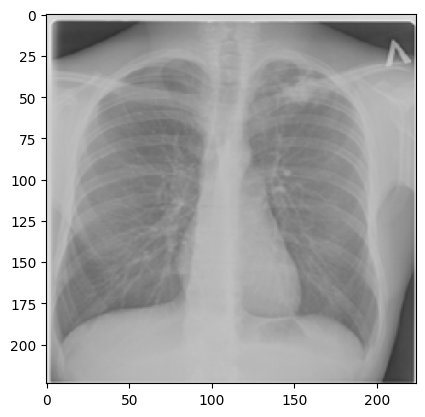

In [15]:
test_image_path="/content/chest-xray-pneumoniacovid19tuberculosis/train/TURBERCULOSIS/Tuberculosis-100.png"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [16]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [17]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
TURBERCULOSIS
